In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()



C:\Users\wrnaf\AppData\Local\Temp\ipykernel_8180\923997221.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
from statsmodels.formula.api import logit

#no interaction - mininmal correlation between variables so we can separate them and dont need to account for them depending on each other

age_gl_no_int = logit('Outcome ~ Age + Glucose', data = diabetes_df).fit()
print(age_gl_no_int.params)
#Outcome = -5.9 + .02(Age) + .04(Glucose)

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64


In [3]:
#With interaction - 
age_gl_no_int = logit('Outcome ~ Age * Glucose', data=diabetes_df).fit()
print (age_gl_no_int.params)
#Outcome = -9.5 + .13(age) + .06(Glucose) - .0008(Age:Glucose)

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= diabetes_df.drop('Outcome', axis = 1)
y= diabetes_df['Outcome']

#split the data in training and test set
#stratification an be (but is not always) queite helpful
#it tries to split the test data into groups that represent the data well
#instead of randomly selecting from the full set

X_train, X_test, y_train, y_test, =train_test_split(X,y, test_size =0.2, random_state =32,stratify=y)

#Standardize
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
                                                    

In [7]:
# simplest logistical regression approach
regression = LogisticRegression(random_state=32).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [8]:
regression.score(X_test, y_test)


0.7922077922077922

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6461200491051238, 0.9169435215946844),
  ('0', '1'): (0.0,
   0.9202657807308969,
   0.6461200491051238,
   0.07973421926910294),
  ('1', '0'): (0.6510951734832332,
   0.0,
   0.34890482651676685,
   0.44296788482834987),
  ('1', '1'): (0.6510951734832332,
   0.4462901439645625,
   0.34890482651676685,
   0.5537098560354374)})

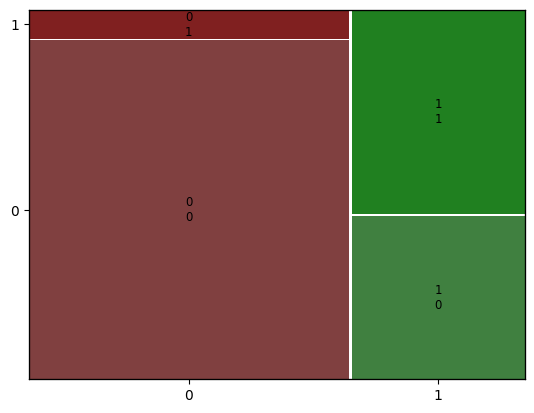

In [15]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

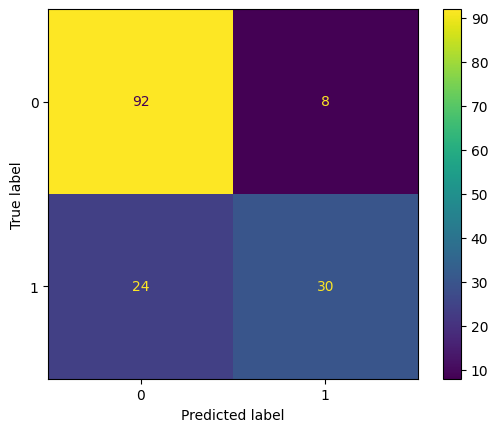

In [16]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [2]:
def precision_and_recall(type: str, tp: int, tn: int, 
                        fp: int, fn: int) -> float:
    value = 0
    if type == "precision":
        value = tp / (tp + fp)
        return value
    elif type == "recall":
        value = tp / (tp + fn)
        return value
    else:
        error_msg = "something went wrong"
        return error_msg

In [3]:
precision_and_recall("precision",30,92,8,24)

0.7894736842105263

In [4]:
precision_and_recall("recall",30,92,8,24)

0.5555555555555556